# NLP Final Project - Thomas Guardi



__Notebook 1__


# EDA and Topic Modeling: LDA, LSI, TFIDF
#### Messy Exploration of what is in this large data dump
#### Sorry for the warnings mess but I don't have time to run these LDA's again!
- Useful findings, LDA has some clues and TFIDF has solid results

In [1]:
from multiprocessing import cpu_count
print(cpu_count())

56


In [2]:
# pip install list
# !pip install pyLDAvis

In [3]:
# always these guys
import numpy as np
import pandas as pd
# for reading in the json
import json
# because you're gonna need to do regex
import re
import matplotlib.pyplot as plt
import pickle
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
pwd

'/home/guardi'

In [6]:
# Colab path
# path = /content/drive/MyDrive/
# local path
# path = '/home/tguardi/Classes/NLP/Final_Project/news_chicago_il.json'
# rcc path
directory = '/project2/msca/kadochnikov/news/'
file = 'news_chicago_il.json'
path = directory + file

In [ ]:
articles = []
for line in open(path,'r'):
    articles.append(json.loads(line))

In [7]:
df = pd.DataFrame.from_dict(articles,orient='columns')
df.shape

(371788, 4)

## Load Cleaned Data

In [4]:
df = pd.read_csv('big_trimmed.csv',index_col=0)

## Doc Clean and Doc Term Matrix

In [5]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# %time title_clean = [clean(doc).split() for doc in df['title_clean']]
%time text_clean = [clean(doc).split() for doc in df['text_clean']]

CPU times: user 2min 36s, sys: 2.09 s, total: 2min 39s
Wall time: 2min 39s


In [6]:
from gensim import corpora, models

# # Creating the term dictionary of our courpus, where every unique term is assigned an index. 

dictionary = corpora.Dictionary(text_clean)

# # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

# %time title_term_matrix = [dictionary.doc2bow(doc) for doc in title_clean]
%time text_term_matrix = [dictionary.doc2bow(doc) for doc in text_clean]


CPU times: user 23.7 s, sys: 1.27 s, total: 25 s
Wall time: 25 s


# **LDA**

In [7]:
import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim

10 Topics

In [8]:
numtopics = 10
%time ldamodel = LdaMulticore(text_term_matrix, num_topics=numtopics, id2word = dictionary, passes=50)
print(*ldamodel.print_topics(num_topics=10, num_words=4), sep='\n')

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 43min 15s, sys: 12min 25s, total: 55min 40s
Wall time: 53min 35s
(0, '0.009*"job" + 0.008*"chicago" + 0.008*"service" + 0.007*"business"')
(1, '0.019*"illinois" + 0.015*"state" + 0.008*"said" + 0.007*"law"')
(2, '0.016*"chicago" + 0.005*"said" + 0.005*"one" + 0.005*"like"')
(3, '0.013*"chicago" + 0.005*"get" + 0.005*"home" + 0.005*"one"')
(4, '0.016*"school" + 0.014*"chicago" + 0.012*"student" + 0.009*"illinois"')
(5, '0.034*"share" + 0.022*"stock" + 0.020*"quarter" + 0.019*"rating"')
(6, '0.013*"game" + 0.013*"illinois" + 0.008*"team" + 0.008*"point"')
(7, '0.033*"estate" + 0.033*"real" + 0.031*"illinois" + 0.028*"broker"')
(8, '0.024*"police" + 0.022*"chicago" + 0.019*"said" + 0.010*"officer"')
(9, '0.017*"said" + 0.016*"illinois" + 0.012*"state" + 0.011*"covid19"')


In [9]:
print(*ldamodel.print_topics(num_topics=10, num_words=5), sep='\n')

(0, '0.009*"job" + 0.008*"chicago" + 0.008*"service" + 0.007*"business" + 0.007*"experience"')
(1, '0.019*"illinois" + 0.015*"state" + 0.008*"said" + 0.007*"law" + 0.007*"court"')
(2, '0.016*"chicago" + 0.005*"said" + 0.005*"one" + 0.005*"like" + 0.004*"new"')
(3, '0.013*"chicago" + 0.005*"get" + 0.005*"home" + 0.005*"one" + 0.005*"time"')
(4, '0.016*"school" + 0.014*"chicago" + 0.012*"student" + 0.009*"illinois" + 0.008*"university"')
(5, '0.034*"share" + 0.022*"stock" + 0.020*"quarter" + 0.019*"rating" + 0.016*"company"')
(6, '0.013*"game" + 0.013*"illinois" + 0.008*"team" + 0.008*"point" + 0.008*"season"')
(7, '0.033*"estate" + 0.033*"real" + 0.031*"illinois" + 0.028*"broker" + 0.026*"data"')
(8, '0.024*"police" + 0.022*"chicago" + 0.019*"said" + 0.010*"officer" + 0.007*"shot"')
(9, '0.017*"said" + 0.016*"illinois" + 0.012*"state" + 0.011*"covid19" + 0.010*"health"')


/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, text_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
import joblib
pyLDAvis.save_html(lda_display, 'lda_disp_TEXT_10.html')
joblib.dump(ldamodel,'lda_TEXT_10')

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['lda_TEXT_10']

### 40 topics

In [12]:
numtopics = 40
%time ldamodel = LdaMulticore(title_term_matrix, num_topics=numtopics, id2word = dictionary, passes=50)
print(*ldamodel.print_topics(num_topics=50, num_words=4), sep='\n')

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 17min 3s, sys: 9min 49s, total: 26min 52s
Wall time: 25min 19s
(0, '0.137*"chicago" + 0.055*"cub" + 0.021*"v" + 0.019*"subtitle"')
(1, '0.099*"illinois" + 0.073*"u" + 0.064*"district" + 0.058*"court"')
(2, '0.130*"chicago" + 0.072*"fire" + 0.066*"season" + 0.029*"pd"')
(3, '0.022*"chicago" + 0.020*"illinois" + 0.018*"inmate" + 0.017*"baby"')
(4, '0.108*"illinois" + 0.054*"state" + 0.040*"park" + 0.034*"lake"')
(5, '0.095*"chicago" + 0.042*"7" + 0.031*"trial" + 0.031*"attorney"')
(6, '0.117*"chicago" + 0.055*"bull" + 0.017*"sport" + 0.016*"last"')
(7, '0.094*"chicago" + 0.025*"—" + 0.022*"2020" + 0.021*"thing"')
(8, '0.096*"illinois" + 0.039*"lead" + 0.031*"st" + 0.025*"past"')
(9, '0.111*"chicago" + 0.027*"best" + 0.024*"illinois" + 0.023*"garage"')
(10, '0.124*"chicago" + 0.042*"blackhawks" + 0.027*"game" + 0.024*"page"')
(11, '0.066*"chicago" + 0.036*"amid" + 0.032*"time" + 0.031*"illinois"')
(12, '0.073*"illinois" + 0.068*"work" + 0.063*"inc" + 0.047*"tool"')
(13, '0

In [14]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, title_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
import joblib
pyLDAvis.save_html(lda_display, 'lda_disp_title_40.html')
joblib.dump(ldamodel,'lda_title_40')

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['lda_title_40']

### LDA 30 Topics

In [26]:
numtopics = 30
# %time ldamodel = LdaMulticore(title_term_matrix, num_topics=numtopics, id2word = dictionary, passes=50)
print(*ldamodel.print_topics(num_topics=30, num_words=6), sep='\n')

(29, '0.126*"2019" + 0.113*"illinois" + 0.113*"department" + 0.107*"earns" + 0.092*"working" + 0.048*"correction"')
(13, '0.059*"illinois" + 0.043*"tribune" + 0.036*"life" + 0.033*"daily" + 0.032*"black" + 0.027*"chicago"')
(11, '0.066*"chicago" + 0.036*"amid" + 0.032*"time" + 0.031*"illinois" + 0.031*"coronavirus" + 0.029*"pandemic"')
(36, '0.122*"chicago" + 0.043*"5" + 0.021*"world" + 0.021*"new" + 0.012*"today" + 0.012*"key"')
(26, '0.051*"illinois" + 0.035*"fund" + 0.030*"chicago" + 0.025*"employee" + 0.023*"change" + 0.023*"update"')
(31, '0.111*"illinois" + 0.031*"pritzker" + 0.027*"covid19" + 0.021*"plan" + 0.017*"gov" + 0.015*"health"')
(35, '0.112*"chicago" + 0.046*"llc" + 0.045*"partner" + 0.029*"group" + 0.028*"share" + 0.025*"equity"')
(22, '0.078*"chicago" + 0.032*"due" + 0.022*"fed" + 0.018*"illinois" + 0.018*"series" + 0.017*"coronavirus"')
(17, '0.246*"–" + 0.132*"chicago" + 0.112*"nbc" + 0.012*"guilty" + 0.012*"pleads" + 0.011*"tribune"')
(14, '0.142*"illinois" + 0.022

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# import joblib
# joblib.dump(ldamodel,'lda_30t_titles.jl')

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['lda_30t_titles.jl']

In [9]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, title_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# pyLDAvis.save_html(lda_display, 'lda_disp_title_30.html')


/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Dominant Topic LDA
- code broke and it wasn't very useful

In [15]:
df1 = pd.read_csv('dominant_topic_df.csv')
df1.head(5)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,1.0,0.8243,"illinois, covid19, coronavirus, case, death, n...","['illinois', 'department', 'public', 'health',..."
1,1,1,1.0,0.3672,"illinois, covid19, coronavirus, case, death, n...","['foto', 'friday', 'alton', 'illinois']"
2,2,2,23.0,0.4741,"chicago, bull, teacher, last, art, michael, st...","['chris', 'broussard', 'michael', 'jordan', 'r..."
3,3,3,7.0,0.2113,"chicago, police, man, officer, shooting, say, ...","['pork', 'chop', 'v', 'people', 'americans’', ..."
4,4,4,21.0,0.5653,"chicago, weekend, shooting, shot, people, 2, k...","['city', 'lasalle', 'restore', 'illinois']"


In [34]:
df1[df1['Dominant_Topic'] == 24]

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
7,7,7,24.0,0.3219,"chicago, tribune, daily, know, like, world, ne...","['7', 'chicago', 'officer', 'injured', 'alterc..."
25,25,25,24.0,0.2131,"chicago, tribune, daily, know, like, world, ne...","['chicago', 'woman', 'test', 'positive', 'covi..."
37,37,37,24.0,0.4546,"chicago, tribune, daily, know, like, world, ne...","['chicago', 'muslim', 'organization', 'tout', ..."
52,52,52,24.0,0.5072,"chicago, tribune, daily, know, like, world, ne...","['greece', '1893', 'chicago']"
54,54,54,24.0,0.4414,"chicago, tribune, daily, know, like, world, ne...","['yellow', 'cab', 'chicago']"
...,...,...,...,...,...,...
290542,290542,290542,24.0,0.1723,"chicago, tribune, daily, know, like, world, ne...","['illinois', 'state', 'house', 'district', '10..."
290543,290543,290543,24.0,0.3315,"chicago, tribune, daily, know, like, world, ne...","['illinois', 'state', 'house', 'district', '10..."
290553,290553,290553,24.0,0.3148,"chicago, tribune, daily, know, like, world, ne...","['chicago', 'cub', '4', 'milwaukee', '2']"
290554,290554,290554,24.0,0.3150,"chicago, tribune, daily, know, like, world, ne...","['chicago', 'cub', '4', 'milwaukee', '2']"


In [16]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
vector_list = []
# dct = Dictionary(dataset)  # fit dictionary
# corpus = title_term_matrix  # convert corpus to BoW format

model = TfidfModel(text_term_matrix)  # fit model

# for i in len(title_term_matrix):
#     vector = model[title_term_matrix[i]]
#     vector_list.append(vector)

# for i in range(10):
#     vector = model[title_term_matrix[i]]
#     vector_list.append(vector)
model = TfidfModel(corpus)  # fit model
vector = model[corpus[0]]  # apply model to the first corpus document

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## LSI gensim
- not much different from LDA

In [33]:
from gensim.models import LsiModel

%time lsimodel = LsiModel(title_term_matrix,id2word = dictionary,num_topics=50)


/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 12min 45s, sys: 6min 9s, total: 18min 54s
Wall time: 1min 1s


In [36]:
print(*lsimodel.print_topics(num_topics=50, num_words=3), sep='\n')

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.951*"chicago" + 0.197*"illinois" + 0.072*"–"')
(1, '0.930*"illinois" + -0.228*"chicago" + 0.106*"2019"')
(2, '-0.492*"2019" + -0.452*"earns" + -0.442*"department"')
(3, '-0.579*"new" + -0.380*"case" + -0.335*"covid19"')
(4, '-0.822*"–" + -0.266*"nbc" + -0.261*"2020"')
(5, '-0.606*"police" + 0.325*"2020" + -0.278*"shot"')
(6, '0.496*"inc" + -0.443*"2020" + 0.333*"work"')
(7, '-0.544*"2020" + 0.397*"il" + -0.302*"new"')
(8, '-0.627*"news" + 0.465*"state" + 0.329*"police"')
(9, '-0.490*"police" + -0.467*"il" + 0.289*"state"')
(10, '-0.691*"state" + -0.416*"news" + -0.358*"new"')
(11, '0.525*"new" + -0.471*"covid19" + -0.300*"coronavirus"')
(12, '-0.629*"shot" + 0.406*"news" + 0.225*"police"')
(13, '-0.753*"coronavirus" + 0.600*"covid19" + 0.089*"–"')
(14, '-0.521*"district" + -0.401*"u" + -0.328*"case"')
(15, '0.507*"v" + -0.264*"mayor" + 0.229*"white"')
(16, '0.375*"shooting" + -0.360*"mayor" + -0.290*"v"')
(17, '-0.417*"shooting" + -0.394*"home" + -0.345*"city"')
(18, '0.526*"hom

## Sklearn TFIDF - TITLES
- some good results in here

In [36]:
df = pd.read_csv('df_clean.csv')

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

#convert to string to load into sklearn tfidf vectorizer
corpus = df['text_clean'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()[:10]


/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['00',
 '000',
 '0000',
 '00001',
 '000021',
 '00003',
 '0000314957',
 '00007',
 '00008',
 '0000812074']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english')
tvec_weights = tvec.fit_transform(corpus)
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
# weights_df.sort_values(by='weight', ascending=False).head(50)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
weights_df.sort_values(by='weight', ascending=False).head(50)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,term,weight
2341,estate,0.018457
4940,real,0.018087
1067,broker,0.014589
1190,cases,0.012297
3715,logo,0.011058
4054,mred,0.011022
4968,reciprocity,0.010966
4427,pay,0.010711
1667,corrections,0.010539
2244,employees,0.009685


In [22]:
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english',ngram_range=(3,4))
tvec_weights = tvec.fit_transform(corpus)
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
# weights_df.sort_values(by='weight', ascending=False).head(50)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
weights_df.sort_values(by='weight', ascending=False).head(50)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,term,weight
1095,mayor lori lightfoot,0.020263
545,department public health,0.011044
308,chicago police department,0.010098
303,chicago mayor lori,0.009329
304,chicago mayor lori lightfoot,0.009006
891,illinois department public,0.008804
1295,president donald trump,0.008766
892,illinois department public health,0.008642
911,illinois state police,0.007821
880,illinois department corrections,0.007685


# TFIDF TEXT

## Useful info in here

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

#convert to string to load into sklearn tfidf vectorizer
corpus = df['text_clean'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
# vectorizer.get_feature_names()

In [30]:
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english',ngram_range=(2,3))
tvec_weights = tvec.fit_transform(corpus)
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(30)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,term,weight
2785,real estate,0.018763
662,chicago police,0.013409
642,chicago il,0.011481
2235,new york,0.011211
1751,illinois state,0.011152
2511,police said,0.010490
1671,https www,0.010297
3596,united states,0.010225
684,chicago tribune,0.009441
2653,public health,0.008813


In [31]:
tf_sort = weights_df.sort_values(by='weight', ascending=False)
tf_sort.shape

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3825, 2)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


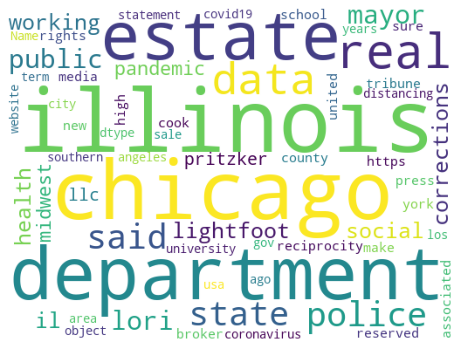

In [32]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(str(tf_sort['term'][:50]))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
# plt.savefig('Plotly-World_Cloud.png')
plt.show()

In [13]:
import pandas as pd
tf_sort = pd.read_csv('tfidf_34weights.csv',index_col=0)

In [51]:
# weights_df.to_csv('tfidf_34weights.csv')

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [49]:
tvec_weights.shape

(290588, 1831)

# T-SNE 
- find a way to integrate this into analysis

In [58]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(tvec_weights)

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# joblib.dump(tsne, 'tsne.jl')
tsne = joblib.load('tsne.jl')

/project2/msca/ivy2/software2/install/Anaconda3-2020.07/envs/NLP1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
